In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [43]:
# 트리 시각화를 위한 모듈 import
!pip install pydot

import pydot
from IPython.core.display import Image 

In [31]:
# Prepare dataset
df = pd.read_csv('C:/Users/endea/Desktop/data/diabetes.csv')

print(df.shape)

(768, 9)


In [32]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
split_count = int(df.shape[0]*0.8)
train = df[:split_count].copy()
train.shape

(614, 9)

In [34]:
test = df[split_count:].copy()
test.shape

(154, 9)

In [35]:
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [36]:
label_name = train.columns[-1]
label_name

'Outcome'

In [37]:
X_train = train[feature_names]
y_train = train[label_name]

print(X_train.shape)
print(y_train.shape)

(614, 8)
(614,)


In [38]:
X_test = test[feature_names]
y_test = test[label_name]

print(y_test.shape)
print(X_test.shape)

(154,)
(154, 8)


In [39]:
# build model
model = DecisionTreeClassifier()
model.fit = model.fit(X_train, y_train)

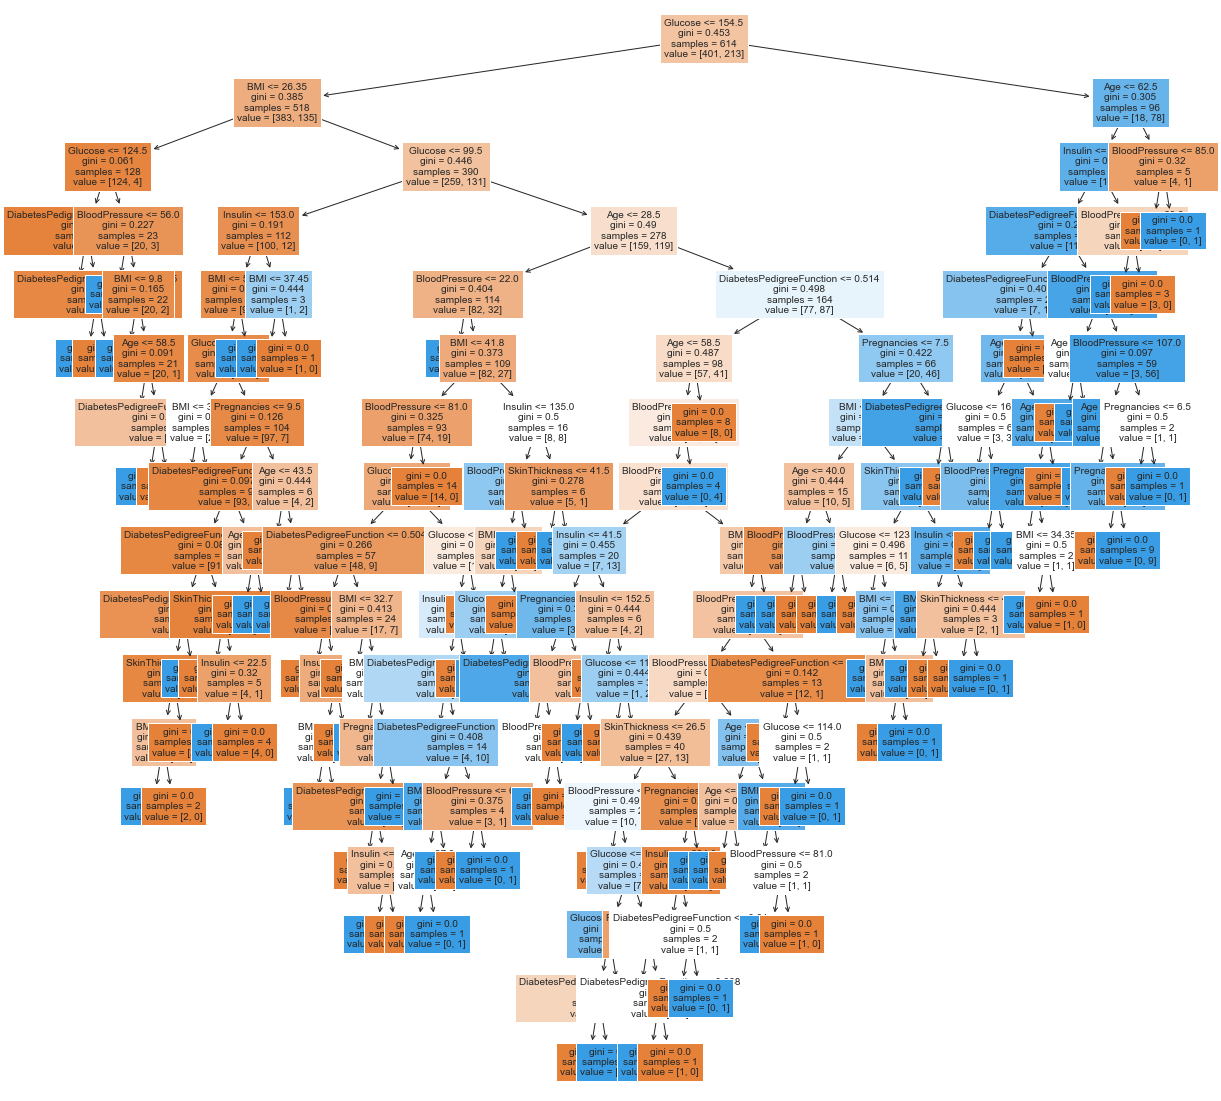

In [50]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 20))
tree = plot_tree(model, feature_names = feature_names, filled = True, fontsize = 10)

In [54]:
y_pred = model.predict(X_test)

In [56]:
# accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test,y_pred))

Accuracy: 0.7272727272727273


In [58]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("pre-pruning Accuracy: {:.3f}".format(tree.score(X_test, y_test)))

pre-pruning Accuracy: 0.727
